In [1]:
# imports
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from sql_config import protocol, username, password, host, port, database_name
import scipy.stats as stats
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import csv
import os

---
# Load Clean Data from Postgres

In [2]:
# create db connection and engine
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

# Read in the postgres cleaned data in table "app_data_clean" into a dataframe
df_clean = pd.read_sql_query('select * from proj4_sch.app_data_clean', con=engine)

In [3]:
# Check the dataframe
df_clean.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOC_COUNT
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
# Check the dataframe continued
df_clean.describe(include = 'all').round(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DOC_COUNT
count,307505.000,307505,307505,307505,307505,307505.000,3.075050e+05,307505.000,307505.000,307505.000,...,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000,307505.000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,278232,202447,202920,213306,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.081,NaN,NaN,NaN,NaN,0.416,1.687967e+05,599028.395,27107.580,537914.488,...,1.401,0.100,-962.859,0.006,0.006,0.030,0.231,0.230,1.643,0.930
std,0.272,NaN,NaN,NaN,NaN,0.715,2.371248e+05,402493.887,14494.547,369633.198,...,2.377,0.362,826.814,0.078,0.103,0.191,0.857,0.744,1.856,0.344
min,0.000,NaN,NaN,NaN,NaN,0.000,2.565000e+04,45000.000,0.000,0.000,...,0.000,0.000,-4292.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,NaN,NaN,NaN,NaN,0.000,1.125000e+05,270000.000,16524.000,238500.000,...,0.000,0.000,-1570.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,NaN,NaN,NaN,NaN,0.000,1.471500e+05,513531.000,24903.000,450000.000,...,0.000,0.000,-757.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
75%,0.000,NaN,NaN,NaN,NaN,1.000,2.025000e+05,808650.000,34596.000,679500.000,...,2.000,0.000,-274.000,0.000,0.000,0.000,0.000,0.000,3.000,1.000


In [5]:
df_sm = df_clean.sample(n=10000
            , frac=None
            , replace=False
            , weights=None
            , random_state=42
            , axis=0)

In [6]:
# Convert categorical data to dummies
df_dummies = pd.get_dummies(df_sm)

# split sample
df0 = df_dummies[df_dummies['TARGET'] == 0]
df1 = df_dummies[df_dummies['TARGET'] == 1]
df0 = df0.drop("TARGET", axis=1)
df1 = df1.drop("TARGET", axis=1)

In [7]:
print (df1.shape, df0.shape)

(818, 132) (9182, 132)


In [8]:
col = (df0.columns)

In [9]:
type(col)

pandas.core.indexes.base.Index

In [10]:
results = []
for col in col:
      res = stats.ttest_ind(df0[col], df1[col], equal_var=False)
      dic = {'variable':col, 'stat':res.statistic, 'pvalue':res.pvalue}
      results.append(dic)

df_results = pd.DataFrame(results)

In [11]:
df_results.sort_values(by=['pvalue'],ascending=False).head(5)

,variable,stat,pvalue
64,NAME_TYPE_SUITE_0,0.004286,0.996581
13,FLAG_CONT_MOBILE,0.027196,0.978309
10,OWN_CAR_AGE,0.112880,0.910150
19,WEEKDAY_APPR_PROCESS_START,0.115487,0.908083
91,NAME_HOUSING_TYPE_Rented apartment,0.117038,0.906854


In [12]:

filename = 't-test_df.csv' 
Save_df = df_results

file_one = os.path.join('.','archive', filename)
Save_df.to_csv(file_one, index=False, header=True)

In [13]:
# data frame containing only variable that are significantly different
df_Sig = df_results[df_results['pvalue'] < 0.05]
df_Sig.head()

,variable,stat,pvalue
0,CNT_CHILDREN,-3.034579,2.475755e-03
1,AMT_INCOME_TOTAL,2.489985,1.293322e-02
2,AMT_CREDIT,2.638679,8.448718e-03
4,AMT_GOODS_PRICE,3.922864,9.323362e-05
5,REGION_POPULATION_RELATIVE,5.120900,3.633045e-07


In [14]:
df_NonSig = df_results[df_results['pvalue'] > 0.05]

In [15]:
nonsig_list = list(df_NonSig['variable'])

In [17]:
df_sig = pd.get_dummies(df_clean)

for var in nonsig_list:
      df_sig= df_sig.drop(var, axis=1)


In [18]:
df_sig.shape

(307505, 70)

---
# KNN with only significant value

In [20]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
# Seperate out the dependent and independen variables
# Split our preprocessed data into our features and target arrays

# this is the target
y = df_sig["TARGET"].values

# Drop y out of the dataframe to get the independent variables
# this is the feature list
X = df_sig.drop("TARGET", axis=1)
independent_variables = df_sig.columns
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,FONDKAPREMONT_MODE_0,FONDKAPREMONT_MODE_reg oper account,HOUSETYPE_MODE_0,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_0,WALLSMATERIAL_MODE_Panel,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No
0,0,202500.0,406597.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,...,0,0,0,1,0,1,0,0,0,1
1,0,270000.0,1293502.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,...,0,0,0,1,0,1,0,0,0,1
2,0,67500.0,135000.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,...,0,0,1,0,1,0,1,0,1,0
3,0,135000.0,312682.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,...,0,0,1,0,1,0,1,0,1,0
4,0,121500.0,513000.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,...,0,0,1,0,1,0,1,0,1,0


In [22]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [23]:
# Check the number of occurrences per target value in the testing data
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the `y_test` array:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the `y_test` array:
[[     0      1]
 [141340  12413]]


In [24]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the `y_train` array:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the `y_train` array:
[[     0      1]
 [141340  12412]]


In [26]:
# Create a StandardScaler() model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data by using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled


array([[ 8.21415123e-01,  1.06410048e-01, -3.69663794e-01, ...,
        -5.24220985e-01,  1.05389863e+00, -1.03844870e+00],
       [-5.80498782e-01,  2.62637576e-01,  1.69202184e+00, ...,
        -5.24220985e-01,  1.05389863e+00, -1.03844870e+00],
       [-5.80498782e-01, -1.06627491e-01, -2.46968695e-01, ...,
        -5.24220985e-01,  1.05389863e+00, -1.03844870e+00],
       ...,
       [ 8.21415123e-01,  2.48435073e-01,  1.90741333e-01, ...,
        -5.24220985e-01,  1.05389863e+00, -1.03844870e+00],
       [-5.80498782e-01, -2.48652516e-01, -8.93082182e-01, ...,
         1.90759246e+00, -9.48857861e-01,  9.62974864e-01],
       [-5.80498782e-01, -1.08721549e-04,  8.74435588e-01, ...,
        -5.24220985e-01,  1.05389863e+00, -1.03844870e+00]])

k: 3, Train/Test Score: 0.930/0.902
k: 5, Train/Test Score: 0.922/0.913
k: 7, Train/Test Score: 0.921/0.916
k: 9, Train/Test Score: 0.920/0.918
k: 11, Train/Test Score: 0.920/0.918
k: 13, Train/Test Score: 0.920/0.919
k: 15, Train/Test Score: 0.919/0.919


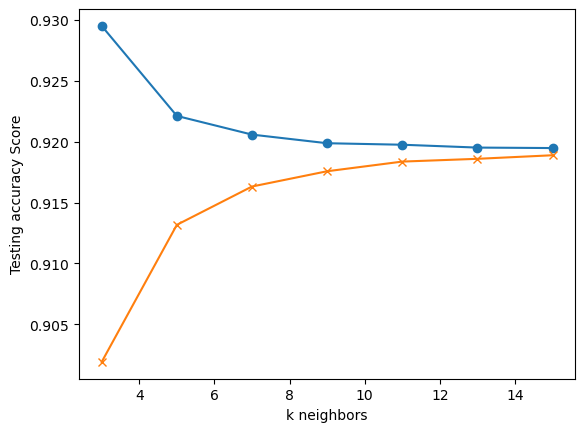

In [27]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []

# run the model for k=3, 5, 7, ... 15)
for k in range(3, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(3, 16, 2), train_scores, marker='o')
plt.plot(range(3, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [28]:
Stop here

SyntaxError: invalid syntax (594711963.py, line 1)

In [37]:
train_scores = []
test_scores = []

k = 21 # look at n nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
train_scores.append(train_score)
test_scores.append(test_score)
#print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
print(f"k: {k}, Train Score: {train_score:.3f}  Test Score: {test_score:.3f}")

k: 21, Train Score: 0.919  Test Score: 0.919


In [38]:
# continue the evaluation of the model
y_true = y_test

# Predict  - using the model calculate results for the text data
y_pred = knn.predict(X_test_scaled)

# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 16
True negatives (TN): 141310
False positives (FP): 30
False negatives (FN): 12397
precision =  0.34782608695652173
accuracy =  0.9191755608020656
sensitivity =  0.0012889712398292113
F1 = 0.0025684244321374106
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    141340
           1       0.35      0.00      0.00     12413

    accuracy                           0.92    153753
   macro avg       0.63      0.50      0.48    153753
weighted avg       0.87      0.92      0.88    153753

